In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

In [12]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# loading Argo EN4 data
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2014-05'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15


# loading EnOI data
ds_hycomcci = xr.open_dataset('../Data/HYCOMcciAVG_vertEN4_2009_2014_monthly.nc')
ds_hycomcci['time'].values = ds_EN4['time'].values


# loading HYCOMfree SST data
ds_hycomfree = xr.open_dataset('../Data/HYCOMfreeAVG_vertEN4_2009_2014_monthly.nc')
ds_hycomfree['time'].values = ds_EN4['time'].values

In [60]:
ds_EN4['depth']

<xarray.DataArray 'depth' (depth: 42)>
array([5.021590e+00, 1.507854e+01, 2.516046e+01, 3.527829e+01, 4.544776e+01,
       5.569149e+01, 6.604198e+01, 7.654591e+01, 8.727029e+01, 9.831118e+01,
       1.098062e+02, 1.219519e+02, 1.350285e+02, 1.494337e+02, 1.657285e+02,
       1.846975e+02, 2.074254e+02, 2.353862e+02, 2.705341e+02, 3.153741e+02,
       3.729655e+02, 4.468009e+02, 5.405022e+02, 6.573229e+02, 7.995496e+02,
       9.679958e+02, 1.161806e+03, 1.378661e+03, 1.615291e+03, 1.868071e+03,
       2.133517e+03, 2.408583e+03, 2.690780e+03, 2.978166e+03, 3.269278e+03,
       3.563041e+03, 3.858676e+03, 4.155628e+03, 4.453502e+03, 4.752021e+03,
       5.050990e+03, 5.350272e+03], dtype=float32)
Coordinates:
  * depth    (depth) float32 5.0215898 15.07854 25.16046 ... 5050.9897 5350.272
Attributes:
    long_name:      depth
    units:          metres
    positive:       down
    standard_name:  depth
    bounds:         depth_bnds

# HYCOM<sub>CCI</sub>

## Temperature

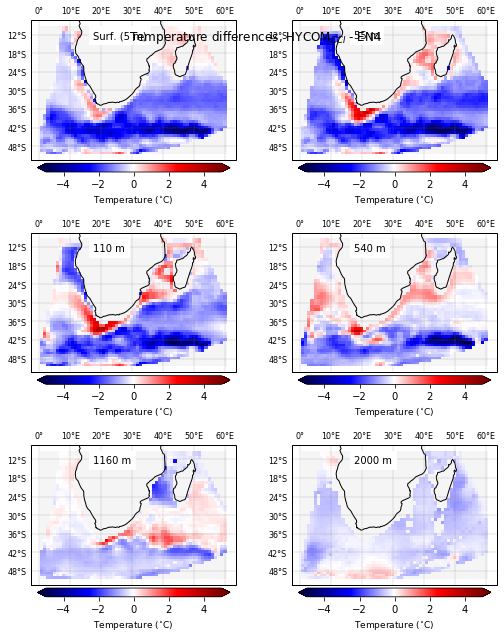

In [13]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature differences, HYCOM$_{CCI}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = ds_hycomcci['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
#     plt.get_cmap('seismic').set_bad(color='whitesmoke')
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_5_55_110_540_1160_2000_HYCOMcciEN4.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## Salinity

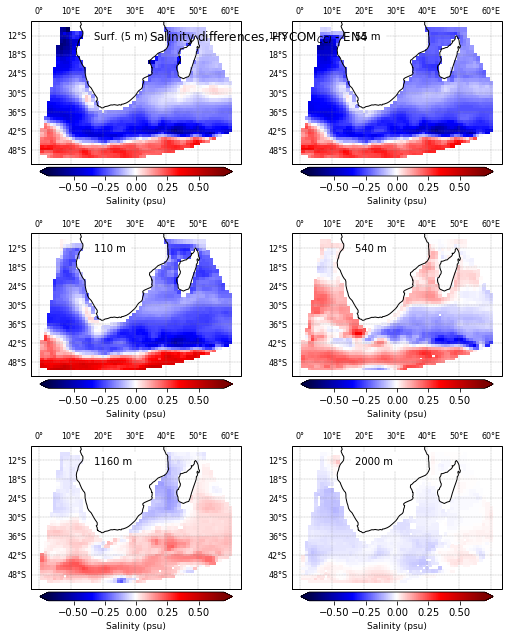

In [95]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity differences, HYCOM$_{CCI}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = ds_hycomcci['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-0.7, vmax=0.7)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_5_55_110_540_1160_2000_HYCOMcciEN4.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# HYCOM<sub>CCI</sub>

## Temperature

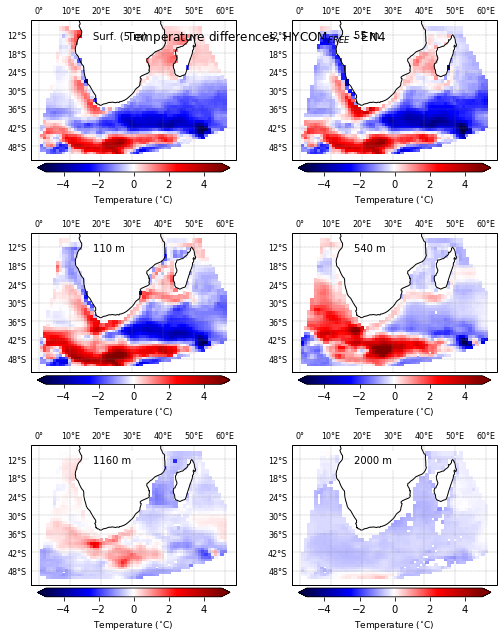

In [96]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature differences, HYCOM$_{FREE}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = ds_hycomfree['temperature'].mean(dim='time')[depths[s]] - ds_EN4['temperature'].mean(dim='time')[depths[s]].values
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-5, vmax=5)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_5_55_110_540_1160_2000_HYCOMfreeEN4.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## Salinity

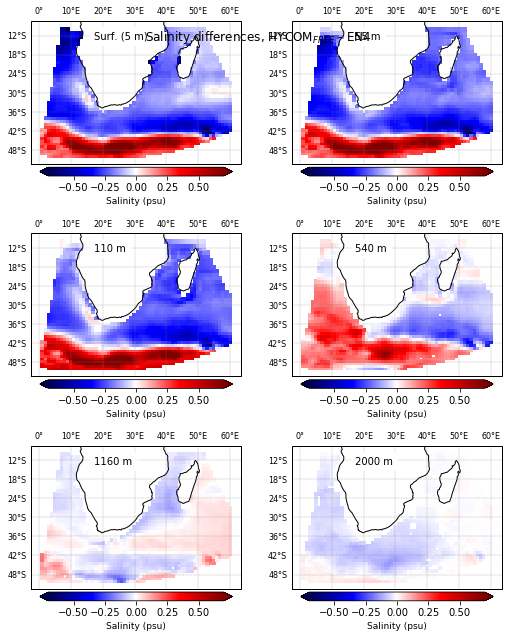

In [97]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity differences, HYCOM$_{FREE}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = ds_hycomfree['salinity'].mean(dim='time')[depths[s]] - ds_EN4['salinity'].mean(dim='time')[depths[s]].values
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-0.7, vmax=0.7)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Salinity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_5_55_110_540_1160_2000_HYCOMfreeEN4.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()